In [2]:
import os
from pathlib import Path
import glob
import pandas as pd
import numpy as np

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook'])

In [4]:
# unique imports
import s3fs #access data from the AWS s3 bucket

In [5]:
# Uses AWS credentials on machine
fs = s3fs.S3FileSystem() 

# which data bucket?
bucket = 'snowex-data'  
      
# contents inside /depths     
flist = fs.ls(f'{bucket}/tutorial-data/core-datasets/depths') 

# show list of files
print('File list is: ', flist)

File list is:  ['snowex-data/tutorial-data/core-datasets/depths/SnowEx2020_SnowDepths_COGM_alldepths_v01.csv']


In [6]:
# open depth data file, and create pandas dataframe
with fs.open(flist[0], 'rb') as f: 
    
    df = pd.read_csv(f, sep=',', header=0, parse_dates=[[2,3]]) #parse the date[2] and time[3] columns such that they are read in as datetime dtypes
    
print('file has been read, and is ready to use.')

file has been read, and is ready to use.


In [7]:
df.dtypes

Date (yyyymmdd)_Time (hh:mm, local, MST)                           datetime64[ns]
Measurement Tool (MP = Magnaprobe; M2 = Mesa 2; PR = Pit Ruler)            object
ID                                                                          int64
PitID                                                                      object
Longitude                                                                 float64
Latitude                                                                  float64
Easting                                                                   float64
Northing                                                                  float64
Depth (cm)                                                                  int64
elevation (m)                                                             float64
equipment                                                                  object
Version Number                                                              int64
dtype: object

In [12]:
df.rename(columns = {
    'Measurement Tool (MP = Magnaprobe; M2 = Mesa 2; PR = Pit Ruler)':'Measurement Tool', 
    'Date (yyyymmdd)_Time (hh:mm, local, MST)': "Datetime"},
          inplace = True)

# set up filter for IOP date range
start = pd.to_datetime('1/28/2020') #first day of GM IOP campaign
end   = pd.to_datetime('2/12/2020') #last day of GM IOP campaign

# filter the IOP date range
df = df[(df['Datetime'] >= start) & (df['Datetime'] <= end)]

print('DataFrame shape is: ', df.shape)
df.head()

DataFrame shape is:  (36388, 12)


,Datetime,Measurement Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
0,2020-01-28 11:48:00,MP,100000,8N58,-108.13515,39.03045,747987.62,4324061.71,94,3148.2,CRREL_B,1
1,2020-01-28 11:48:00,MP,100001,8N58,-108.13516,39.03045,747986.75,4324061.68,74,3148.3,CRREL_B,1
2,2020-01-28 11:48:00,MP,100002,8N58,-108.13517,39.03045,747985.89,4324061.65,90,3148.2,CRREL_B,1
3,2020-01-28 11:48:00,MP,100003,8N58,-108.13519,39.03044,747984.19,4324060.49,87,3148.6,CRREL_B,1
4,2020-01-28 11:48:00,MP,100004,8N58,-108.13519,39.03042,747984.26,4324058.27,90,3150.1,CRREL_B,1


In [13]:
# group data by the measurement tool 
gb = df.groupby('Measurement Tool', as_index=False).mean().round(1)

# show mean snow depth from each tool
gb[['Measurement Tool', 'Depth (cm)']]

,Measurement Tool,Depth (cm)
0,M2,97.0
1,MP,94.8
2,PR,94.6


In [24]:
gb = df.groupby('PitID', as_index=False).mean().round(1)

gb[['PitID', 'Depth (cm)']]

,PitID,Depth (cm)
0,1C1,90.4
1,1C14,83.2
2,1C7,91.1
3,1C8,91.2
4,1N1,66.0
...,...,...
143,9S40,86.9
144,9S51,86.6
145,FL2A,112.0
146,GML,115.0


In [25]:
print('List of Measurement Tools: ', df['Measurement Tool'].unique())

List of Measurement Tools:  ['MP' 'M2' 'PR']


In [26]:
r = df.loc[df['Measurement Tool'] == 'PR']
print('DataFrame shape is: ', r.shape)
r.head()

DataFrame shape is:  (148, 12)


,Datetime,Measurement Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
37755,2020-01-30 11:24:00,PR,300001,7C15,-108.19593,39.04563,742673.94,4325582.37,100,3048.699951,ruler,1
37756,2020-01-29 15:00:00,PR,300002,6C37,-108.14791,39.00760,746962.00,4321491.00,117,3087.709961,ruler,1
37757,2020-02-09 12:30:00,PR,300003,8C31,-108.16401,39.02144,745520.00,4322983.00,98,3099.639893,ruler,1
37758,2020-01-28 09:13:00,PR,300004,6N18,-108.19103,39.03404,743137.23,4324309.43,92,3055.590088,ruler,1
37760,2020-02-10 10:30:00,PR,300006,8S41,-108.14962,39.01659,746783.00,4322484.00,95,3113.870117,ruler,1


In [27]:
r = df.loc[df['Measurement Tool'] == 'M2']
print('DataFrame shape is: ', r.shape)
r.head()

DataFrame shape is:  (4390, 12)


,Datetime,Measurement Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
33364,2020-01-28 12:00:00,M2,200000,5N19,-108.19004,39.03367,743224.04,4324271.07,102,3060.91,Mesa2_1,1
33365,2020-01-28 12:01:00,M2,200001,5N19,-108.18998,39.03364,743229.71,4324267.84,123,3060.90,Mesa2_1,1
33366,2020-01-28 12:02:00,M2,200002,5N19,-108.18993,39.03359,743234.40,4324262.71,123,3060.98,Mesa2_1,1
33367,2020-01-28 12:02:00,M2,200003,5N19,-108.18993,39.03353,743234.02,4324255.79,114,3060.53,Mesa2_1,1
33368,2020-01-28 12:03:00,M2,200004,5N19,-108.18995,39.03347,743233.02,4324248.33,117,3060.49,Mesa2_1,1


In [28]:
# pit ruler snow depths from Grand Mesa IOP
r = df.loc[df['Measurement Tool'] == 'PR'] 
print( 'DataFrame is back to only pit ruler depths')

DataFrame is back to only pit ruler depths


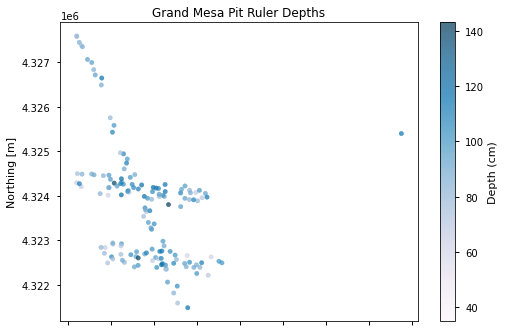

Notice the point on the far right - that is the "GML" or Grand Mesa Lodge pit where all instruments were deployed for a comparison study. pitID=GML


In [29]:
# plot pit ruler depths 
ax = r.plot(x='Easting', y='Northing', c='Depth (cm)', kind='scatter', alpha=0.7, colorbar=True, colormap='PuBu', legend=True)
ax.set_title('Grand Mesa Pit Ruler Depths')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
plt.show()

print('Notice the point on the far right - that is the "GML" or Grand Mesa Lodge pit where all instruments were deployed for a comparison study. pitID=GML')

Text(0, 0.5, 'Frequency')

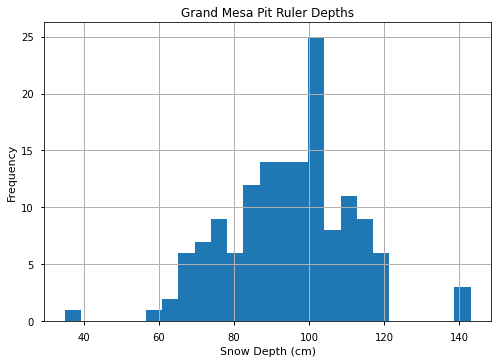

In [30]:
# plot histogram of pit ruler depths
ax = r['Depth (cm)'].plot.hist(bins=25)
ax.grid()
ax.set_title('Grand Mesa Pit Ruler Depths')
ax.set_xlabel('Snow Depth (cm)')
ax.set_ylabel('Frequency')

In [31]:
fs = s3fs.S3FileSystem() 

# which data bucket?
bucket = 'snowex-data'  
      
# contents inside /pits     
flist = fs.ls(f'{bucket}/tutorial-data/core-datasets/pits/')

# which files do we want?
suffix='.csv'

# list comprehension to get .csv files (not .xlsx or .jpgs)
csv_files = [filename for filename in flist if filename.endswith(suffix)]
csv_files[:5]

['snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_LWC_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_density_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_siteDetails_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_stratigraphy_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_temperature_v01.csv']

In [32]:
# what files would you like to find?
parameter = 'temperature'
pitID = '5N19'
date = '20200128'

In [33]:
with fs.open('/snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_{}_{}_{}_v01.csv'.format(date, pitID, parameter), 'rb') as f:
    
    t = pd.read_csv(f, header=7)
t

,# Height (cm),Temperature (deg C)
0,102,-9.5
1,100,-9.4
2,90,-11.5
3,80,-7.5
4,70,-5.2
5,60,-4.1
6,50,-3.5
7,40,-3.0
8,30,-2.5
9,20,-2.1


Text(0, 0.5, 'Snow Depth (cm)')

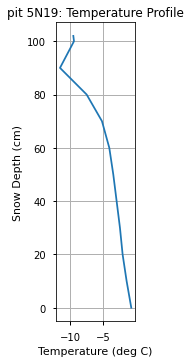

In [34]:
# plot temperature
ax = t.plot(x='Temperature (deg C)',y='# Height (cm)', legend=False)
ax.set_aspect(0.4)
ax.grid()
ax.set_title('pit {}: Temperature Profile'.format(pitID))
ax.set_xlabel('Temperature (deg C)')
ax.set_ylabel('Snow Depth (cm)')

In [35]:
# grab a different pit parameter file
parameter = 'density'
with fs.open('/snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_{}_{}_{}_v01.csv'.format(date, pitID, parameter), 'rb') as f:

    d = pd.read_csv(f, header=7)
d

,# Top (cm),Bottom (cm),Density A (kg/m3),Density B (kg/m3),Density C (kg/m3)
0,102.0,92.0,136.0,138.0,NaN
1,92.0,82.0,193.0,192.0,NaN
2,82.0,72.0,232.0,221.0,NaN
3,72.0,62.0,262.0,260.0,NaN
4,62.0,52.0,275.0,278.0,NaN
5,52.0,42.0,261.0,252.0,NaN
6,42.0,32.0,267.0,269.0,NaN
7,32.0,22.0,336.0,367.0,NaN
8,22.0,12.0,268.0,246.0,NaN
9,12.0,2.0,262.0,271.0,NaN


In [36]:
# get the average density 
d['Avg Density (kg/m3)'] = d[['Density A (kg/m3)', 'Density B (kg/m3)', 'Density C (kg/m3)']].mean(axis=1, skipna=True)
d

,# Top (cm),Bottom (cm),Density A (kg/m3),Density B (kg/m3),Density C (kg/m3),Avg Density (kg/m3)
0,102.0,92.0,136.0,138.0,NaN,137.0
1,92.0,82.0,193.0,192.0,NaN,192.5
2,82.0,72.0,232.0,221.0,NaN,226.5
3,72.0,62.0,262.0,260.0,NaN,261.0
4,62.0,52.0,275.0,278.0,NaN,276.5
5,52.0,42.0,261.0,252.0,NaN,256.5
6,42.0,32.0,267.0,269.0,NaN,268.0
7,32.0,22.0,336.0,367.0,NaN,351.5
8,22.0,12.0,268.0,246.0,NaN,257.0
9,12.0,2.0,262.0,271.0,NaN,266.5


Text(0, 0.5, 'Snow Depth (cm)')

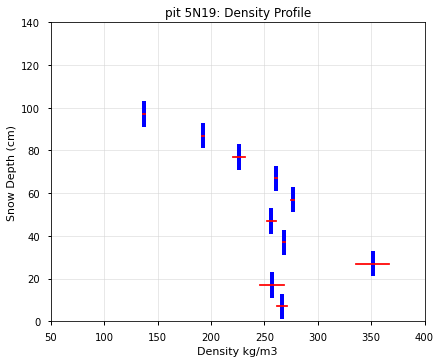

In [37]:
def plot_density(ax, dataframe):
    
    '''
    This function helps you plot density profiles from snow pits. Use it to iterate through 
    DataFrame rows and plot the density for each top and bottom segment.
    
    '''
    
    for index, row in dataframe.iterrows():
        # plot blue bars to represent 10cm density intervals
        top = row['# Top (cm)']
        bottom = row['Bottom (cm)']
        dens = row["Avg Density (kg/m3)"]
        ax.plot([dens, dens],[bottom, top], color='blue', linewidth=4)

        # plot a red cross to show the spread between A and B samples
        densA = row["Density A (kg/m3)"]
        densB = row["Density B (kg/m3)"]
        middle = bottom + 5.
        ax.plot([densA, densB],[middle,middle], color='red')
        
    return ax

fig, ax = plt.subplots()
ax = plot_density(ax, d)
ax.set_xlim(50, 400)
ax.set_ylim(0, 140)
ax.grid(color='lightgray', alpha=.5)
ax.set_aspect(2)
ax.set_title('pit {}: Density Profile'.format(pitID))
ax.set_xlabel('Density kg/m3')
ax.set_ylabel('Snow Depth (cm)')   

In [38]:
import datetime

#database imports
from snowexsql.db import get_db
from snowexsql.data import PointData, LayerData, ImageData, SiteData
from snowexsql.conversions import query_to_geopandas

In [39]:
# load the database
db_name = 'snow:hackweek@52.32.183.144/snowex'
engine, session = get_db(db_name)

print('snowexsql database successfully loaded!')

snowexsql database successfully loaded!


In [40]:
# Query the session using .surveyors() to generate a list
qry = session.query(ImageData.surveyors)

# Locate all that are distinct
airborne_sensors_list = session.query(ImageData.surveyors).distinct().all()

print('list of airborne sensors by "surveyor" name: \n', airborne_sensors_list)

list of airborne sensors by "surveyor" name: 
 [('USGS',), ('UAVSAR team, JPL',), ('ASO Inc.',)]


In [41]:
# airborne sensor from list above
sensor = 'UAVSAR team, JPL'

# Form on the Images table that returns Raster collection dates
qry = session.query(ImageData.date)

# Filter for UAVSAR data
qry = qry.filter(ImageData.surveyors == sensor)

# Grab the unique dates
qry = qry.distinct()

# Execute the query 
dates = qry.all() 

# Clean up the dates 
dates = [d[0] for d in dates] 
dlist = [str(d) for d in dates]
dlist = ", ".join(dlist)
print('%s flight dates are: %s' %(sensor, dlist))

# Find all the snow pits done on these days
qry = session.query(SiteData.geom, SiteData.site_id, SiteData.date)
qry = qry.filter(SiteData.date.in_(dates))

# return a geopandas df
df = query_to_geopandas(qry, engine)
df.head()

# Close your session to avoid hanging transactions
session.close()

UAVSAR team, JPL flight dates are: 2020-01-31, 2020-02-12


In [42]:
# Pick a day from the list of dates
dt = dates[0] 

# Find all the snow pits done on these days 
qry = session.query(SiteData.geom, SiteData.site_id, SiteData.date)
qry = qry.filter(SiteData.date == dt)

# return a geopandas df
df_exact = query_to_geopandas(qry, engine)

print('%s pits overlap with %s on %s' %(len(df_exact), sensor, dt))
df_exact.head()

17 pits overlap with UAVSAR team, JPL on 2020-01-31


,geom,site_id,date
0,POINT (740652.000 4327445.000),2C2,2020-01-31
1,POINT (744396.000 4323540.000),8C26,2020-01-31
2,POINT (741960.000 4326644.000),6C10,2020-01-31
3,POINT (741493.000 4326833.000),1C8,2020-01-31
4,POINT (745340.000 4322754.000),8S28,2020-01-31


In [43]:
# Form a date range to query on either side of our chosen day 
date_range = [dt + i * datetime.timedelta(days=1) for i in [-1, 0, 1]]

# Find all the snow pits done on these days and return a geopandas df
qry = session.query(SiteData.geom, SiteData.site_id, SiteData.date)
qry = qry.filter(SiteData.date.in_(date_range))

# return a geopandas df
df_range = query_to_geopandas(qry, engine)

# clean up dates (for print statement only)
dlist = [str(d) for d in date_range]
dlist = ", ".join(dlist)

print('%s pits overlap with %s on %s' %(len(df_range), sensor, dlist))
df_range

47 pits overlap with UAVSAR team, JPL on 2020-01-30, 2020-01-31, 2020-02-01


,geom,site_id,date
0,POINT (744561.000 4322721.000),5S21,2020-02-01
1,POINT (746228.000 4322671.000),9S39,2020-02-01
2,POINT (745937.000 4322754.000),2S37,2020-02-01
3,POINT (746546.000 4324066.000),8N45,2020-02-01
4,POINT (746350.000 4321976.000),6C34,2020-02-01
5,POINT (746149.000 4322488.000),3S38,2020-02-01
6,POINT (743652.000 4322680.000),3S14,2020-02-01
7,POINT (747055.000 4323916.000),5N50,2020-02-01
8,POINT (746553.000 4323759.000),6N46,2020-02-01
9,POINT (746303.000 4322571.000),9S40,2020-02-01


In [44]:
# Find all the data that was collected on 2-12-2020
dt = datetime.date(2020, 2, 12)

# Grab all Point data instruments from our date
point_instruments = session.query(PointData.instrument).filter(PointData.date == dt).distinct().all()
print('Point Data on %s are: \n%s', (str(dt), point_instruments))

# Grab all Layer data instruments from our date
layer_instruments = session.query(LayerData.instrument, LayerData.type).filter(LayerData.date == dt).distinct().all()
print('\nLayer Data are: \n', layer_instruments)

# Grab all Image data instruments from our date
image_instruments = session.query(ImageData.instrument).filter(ImageData.date == dt).distinct().all()
print('\nImage Data are: \n', image_instruments)

qry = session.query(PointData.geom, PointData.instrument, PointData.site_id, PointData.date)
qry = qry.filter(PointData.date == dt) 
df = query_to_geopandas(qry, engine)
df

qry = session.query(LayerData.geom, LayerData.instrument, LayerData.site_id, LayerData.date)
qry = qry.filter(LayerData.date == dt) 
df = query_to_geopandas(qry, engine)
df

qry = session.query(ImageData.instrument, ImageData.site_id, ImageData.date)
qry = qry.filter(ImageData.date == dt) 
qry = qry.distinct()

Point Data on %s are: 
%s ('2020-02-12', [('camera-trap',), ('magnaprobe',), ('pit ruler',)])

Layer Data are: 
 [('IRIS', 'equivalent_diameter'), ('IRIS', 'reflectance'), ('IRIS', 'sample_signal'), ('IRIS', 'specific_surface_area'), ('IS3-SP-11-01F', 'equivalent_diameter'), ('IS3-SP-11-01F', 'reflectance'), ('IS3-SP-11-01F', 'sample_signal'), ('IS3-SP-11-01F', 'specific_surface_area'), ('snowmicropen', 'force'), (None, 'density'), (None, 'grain_size'), (None, 'grain_type'), (None, 'hand_hardness'), (None, 'lwc_vol'), (None, 'manual_wetness'), (None, 'permittivity'), (None, 'temperature')]

Image Data are: 
 [('UAVSAR, L-band InSAR',)]


In [45]:
str(dt)

'2020-02-12'

In [46]:
def parse_veg_class(site_id):
    
    '''
    This function parses snow pit data into three vegetation classes:
        - 1). Treeless, 2). Sparce, and 3). Dense
        
    It uses a python dictionary where:
        (k) keys: are the vegetation classes
        (v) values: are the first digit in the pitID assignment

    
    '''
    
    # Classifying by vegetation coverage 
    veg_class = {'treeless':[1, 2, 3], 'sparse':[4, 5, 6], 'dense':[7, 8, 9]}
   
    vclass = None 
    
    class_id = site_id[0]
    
    if class_id.isnumeric():
        class_id = int(class_id)

        for k,v in veg_class.items():

            if class_id in v: #if the first digit in the site_id is 'v' assign it to the corresponding 'k'
                vclass = k 
                
    return vclass 

In [47]:
def parse_depth_class(site_id):
    
    '''
    This function parses snow pit data into three depth classes:
        - 1). Shallow, 2). Medium, and 3). Deep
        
    It uses a python dictionary where:
        (k) keys: are the depth classes
        (v) values: are the first digit in the pitID assignment
      
  
    '''
        
    # Classifying by expected depth 
    depth_class = {'shallow':[1, 4, 7], 'medium':[2, 5, 8], 'deep':[3, 6, 9]} 
   
    dclass = None 
    
    class_id = site_id[0]
    
    if class_id.isnumeric(): #for the outlier TS site
        class_id = int(class_id) #cast as integer

        for k,v in depth_class.items(): #for the key, value pairs in the dict listed above:

            if class_id in v: #if the first digit in the site_id is 'v' assign it to the corresponding 'k'
                dclass = k 

    return dclass 

In [48]:
# load the database
db_name = 'snow:hackweek@52.32.183.144/snowex'
engine, session = get_db(db_name)

result = session.query(LayerData.type).distinct().all()

qry = session.query(LayerData).filter(LayerData.type=='density')

# Form our dataframe from the query 
df = query_to_geopandas(qry, engine)
df['value'] = df['value'].astype(float) #cast the value as a float (they are strings)
 
# parse snow pit data by the veg/depth matrix
df['veg_class'] = [parse_veg_class(i) for i in df['site_id']] #run the parse_veg function for every site_id
df['depth_class'] = [parse_depth_class(i) for i in df['site_id']] #run the parse_depth funciton for every site_id

# # Show off our df 
#df.plot()

df.columns
col_list = ['site_name', 'date', 'id', 'instrument', 'type', 'units', 'surveyors', 'latitude',
       'longitude', 'geom','depth', 'site_id', 'value', 'veg_class', 'depth_class']
df = df[col_list]
df.head()

,site_name,date,id,instrument,type,units,surveyors,latitude,longitude,geom,depth,site_id,value,veg_class,depth_class
0,Grand Mesa,2020-01-30,4272,None,density,None,None,39.039987,-108.191917,POINT (743040.000 4324967.000),75.0,9C17,124.5,dense,deep
1,Grand Mesa,2020-01-30,4273,None,density,None,None,39.039987,-108.191917,POINT (743040.000 4324967.000),65.0,9C17,207.0,dense,deep
2,Grand Mesa,2020-01-30,4274,None,density,None,None,39.039987,-108.191917,POINT (743040.000 4324967.000),55.0,9C17,230.0,dense,deep
3,Grand Mesa,2020-01-30,4275,None,density,None,None,39.039987,-108.191917,POINT (743040.000 4324967.000),45.0,9C17,258.5,dense,deep
4,Grand Mesa,2020-01-30,4276,None,density,None,None,39.039987,-108.191917,POINT (743040.000 4324967.000),35.0,9C17,258.0,dense,deep


In [49]:
# These are all of the unique site ids 
len(df['site_id'].unique())

153

In [50]:
#make df with only 153 rows using site_id.unique
gb = df.groupby(['site_id', 'veg_class'])
#gb = df.groupby('site_id')
gb['site_name'].count().groupby("veg_class").count()

veg_class
dense       50
sparse      39
treeless    60
Name: site_name, dtype: int64

In [51]:
d = df[['veg_class', 'depth_class']].groupby(df['site_id']).groups
gb = df.groupby(['veg_class', 'site_id']).count()
gb = df.groupby(['site_id']).count()
#df['veg_class'].groupby('veg_class').count()

print(gb)

         site_name  date  id  instrument  type  units  surveyors  latitude  \
site_id                                                                      
1C1             31    31  31           0    31      0          0        31   
1C14            13    13  13           0    13      0          0        13   
1C5             13    13  13           0    13      0          0        13   
1C7             16    16  16           0    16      0          0        16   
1C8             16    16  16           0    16      0          0        16   
...            ...   ...  ..         ...   ...    ...        ...       ...   
9S51            12    12  12           0    12      0          0        12   
FL1B            19    19  19           0    19      0          0        19   
FL2A            22    22  22           0    22      0          0        22   
GML             22    22  22           0    22      0          0        22   
TLSFL2A         18    18  18           0    18      0          0

In [58]:
df[['veg_class', 'site_id']].groupby('veg_class').count() #table I like!

,site_id
veg_class,
dense,923
sparse,801
treeless,1017


In [59]:
# Great for debugging especially when trying different queries
session.rollback()